--- 
## Operations visualization from different executions of TestBench

In [1]:
import glob
import os
import pandas as pd
import seaborn as snsß
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import seaborn as sns
import pandas as pd
from collections import deque
import shapely
import shapely.wkt
import time
import struct
import math
import numpy as np
from shapely import GeometryType as GT
import bisect
from bitarray import bitarray, util, bits2bytes
import random
import tqdm
from algos.alg_fpd_extended import FpdExtended
from var_float import VarFloat

In [2]:
COUNT_PER_PRECISION = 10000
FLOAT_SIZE = 32
EXPONENT = 6
var_float = VarFloat(EXPONENT, FLOAT_SIZE)

In [3]:
from math import floor, log10, inf
def num_zeros(decimal):
    return inf if decimal == 0 else -floor(log10(abs(decimal))) - 1

In [4]:
dec_errors = {}
for float_size in tqdm.tqdm(range(16,65)):
    FLOAT_SIZE = float_size
    var_float.FLOAT_SIZE = FLOAT_SIZE
    dec_errors[FLOAT_SIZE] = {1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0} 
    for i in range(COUNT_PER_PRECISION):
        float = round(random.uniform(0.0, 1),7)
        if var_float.bin_to_float(var_float.float_to_bin(float)) != float:
            round_err = abs(var_float.bin_to_float(var_float.float_to_bin(float)) - float)
            res = num_zeros(round_err) + 1
            if res > 7:
                continue
            dec_errors[FLOAT_SIZE][num_zeros(round_err) + 1] += 1
bar_plot = pd.DataFrame(dec_errors).T

100%|██████████| 49/49 [00:15<00:00,  3.12it/s]


In [5]:
bar_plot2 = bar_plot/COUNT_PER_PRECISION

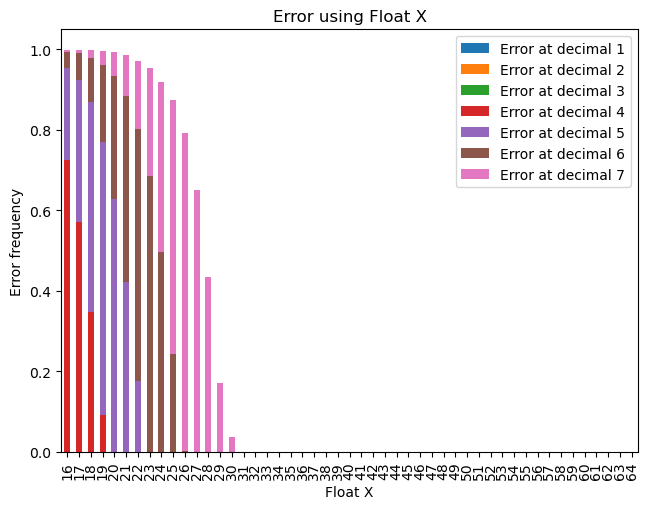

In [6]:
bar_plot2.plot (kind = 'bar', stacked = True)
plt.tight_layout()
plt.xlabel ('Float X')
plt.ylabel ('Error frequency')
plt.title ('Error using Float X')
plt.legend(labels=[ "Error at decimal 1", 
                    "Error at decimal 2", 
                    "Error at decimal 3", 
                    "Error at decimal 4", 
                    "Error at decimal 5", 
                    "Error at decimal 6",
                    "Error at decimal 7"
                    ])

plt.show ()